

# Project: Investigate a Dataset (No Show Appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project I am investigating the No show appointments dataset

> At the end we will find out Genres that have highest movie releases and the highest year in terms of revenue

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


### Data Cleaning



In [5]:
# finiding if there are duplicate values or not
df.duplicated().sum()


0

###### So there are no duplicate values and no null values 

###### The next step will be to convert the date columns into Date Time instead of float 

In [6]:
## convert the 'ScheduledDay' and 'AppointmentDay'column to datetime format
df['ScheduledDay']= pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay']= pd.to_datetime(df['AppointmentDay'])

In [7]:
# Checking the column type after conversion to date time

df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [8]:
# so now the no show column is an object or bollean values 
# we can convert them to 1 and 0 so we can make the analysis easier

In [9]:
df['No-show'] = df['No-show'].replace({'Yes':1,'No':0})
df.tail(11)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110516,6.923772e+13,5780205,F,2016-06-07 07:45:16+00:00,2016-06-08 00:00:00+00:00,37,MARIA ORTIZ,0,0,0,0,0,0,1
110517,5.574942e+12,5780122,F,2016-06-07 07:38:34+00:00,2016-06-07 00:00:00+00:00,19,MARIA ORTIZ,0,0,0,0,0,0,0
110518,7.263315e+13,5630375,F,2016-04-27 15:15:06+00:00,2016-06-07 00:00:00+00:00,50,MARIA ORTIZ,0,0,0,0,0,1,0
110519,6.542388e+13,5630447,F,2016-04-27 15:23:14+00:00,2016-06-07 00:00:00+00:00,22,MARIA ORTIZ,0,0,0,0,0,1,0
110520,9.969977e+14,5650534,F,2016-05-03 07:51:47+00:00,2016-06-07 00:00:00+00:00,42,MARIA ORTIZ,0,0,0,0,0,1,0
110521,3.635534e+13,5651072,F,2016-05-03 08:23:40+00:00,2016-06-07 00:00:00+00:00,53,MARIA ORTIZ,0,0,0,0,0,1,0
110522,2.572134e+12,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,0
110523,3.596266e+12,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,0
110524,1.557663e+13,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,0
110525,9.213493e+13,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,0


In [10]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.201933
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


### Primary Observation: 
#### From the above describtion alone we can find many iformation:
###### 1- The average age of the collected date is 37 years old and 75% of the sample are around 55 years old
###### 2- Most of the people did show up for their appointments more than 75%
###### 3- Around 9% only of the patients received the scholarship
###### 4- Most of the patients don't have underlying diseases such as diabetes or hipertenstion most likely because the sample consists of relatively young patients

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1: Plotting the age of the collected sample and check its distribution

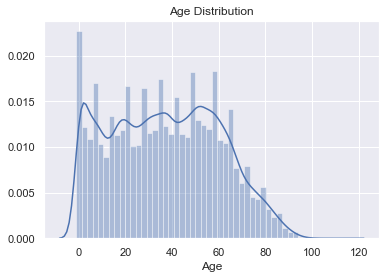

In [13]:
# ploting the distribution of Age using Seaborn
sns.distplot(df['Age']).set_title('Age Distribution');

In [15]:
# there are very little number of patients above 100 years old we can drop them to get more accurate distribution
q = df['Age'].quantile(0.99)

In [16]:
df_1 = df[df['Age']<q]

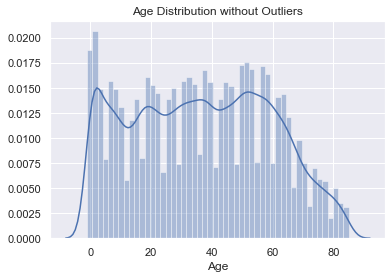

In [17]:
sns.distplot(df_1['Age']).set_title('Age Distribution without Outliers');

> as we can see now the age is normally distributed with mean around 40 years old 

In [18]:
# viewing the values after removing 0.01% of the data
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109367 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       109367 non-null  float64            
 1   AppointmentID   109367 non-null  int64              
 2   Gender          109367 non-null  object             
 3   ScheduledDay    109367 non-null  datetime64[ns, UTC]
 4   AppointmentDay  109367 non-null  datetime64[ns, UTC]
 5   Age             109367 non-null  int64              
 6   Neighbourhood   109367 non-null  object             
 7   Scholarship     109367 non-null  int64              
 8   Hipertension    109367 non-null  int64              
 9   Diabetes        109367 non-null  int64              
 10  Alcoholism      109367 non-null  int64              
 11  Handcap         109367 non-null  int64              
 12  SMS_received    109367 non-null  int64              
 13  No-show       

#### Now Lets check if there is a correlation between the age of the patient and no_show frequency

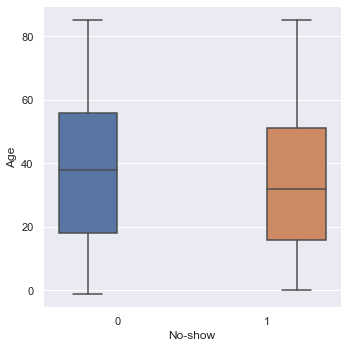

In [26]:
# since the no-show columns are 1s and 0s then we can get the log to check the correlation

sns.catplot(x="No-show", y="Age", kind="box",hue="No-show", data=df_1);

> The above title represents the correlation between age and no show (most of the no show patients are a little younger)

In [28]:
# counting the number of patiens that didn't show up for their appointments.
df_1[df_1['No-show'] ==1].count()['No-show']

22124

In [29]:
# so 22124 patients out of 109367 patients

percentage = 22124 / 109367
percentage

0.2022913675971728

In [30]:
# average age for the patients didn't show up
df_1[df_1['No-show'] ==1].mean()['Age']

33.82968721750136

In [31]:
# average age for the patients showed up 
df_1[df_1['No-show'] ==0].mean()['Age']

37.222665428744996

#### so there is 20% of the patients didn't show for the appointments with average age of 33 years old 
#### along with the above box plot we can say that most of the patients no show are on the young side

### Research Question 2: The correlation between age, scholarship and no-show

> first, correlation between scholarship and no-show

In [32]:
# counting the number of patients who got the scholarship
Scholarship_yes = df_1[df_1['Scholarship'] == 1].count()['Scholarship']

In [33]:
Scholarship_yes

10861

In [34]:
# counting the number of patient that didn't get the scholarship
Scholarship_no = df_1[df_1['Scholarship'] == 0].count()['Scholarship']

In [35]:
Scholarship_no

98506

In [36]:
# the total percentage of the patients who got the scholarship
percentage_yes = Scholarship_yes / 109367
percentage_yes 

0.09930783508736639

In [37]:
# the total percentage of patients that didn't get the scholarship
percentage_no = Scholarship_no / 109367
percentage_no

0.9006921649126336

In [38]:
# patients who didn't get the scholarship and was no show
Scholarship_no1 = df_1[df_1['Scholarship'] == 0].sum()['No-show']

In [39]:
Scholarship_no1

19546

In [40]:
# patients who got the scholarship and was no show
Scholarship_yes1 = df_1[df_1['Scholarship'] == 1].sum()['No-show']

In [41]:
Scholarship_yes1

2578

In [42]:
scholarship = pd.DataFrame({'Scholarship Yes': [percentage_yes], 'Scholarship No': [percentage_no]}, index = ['Percentage'])
scholarship

,Scholarship Yes,Scholarship No
Percentage,0.099308,0.900692


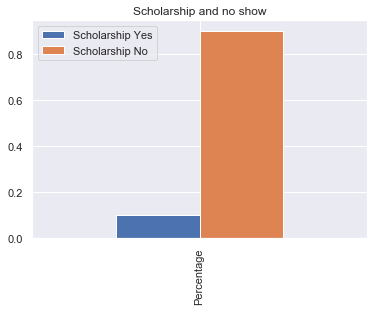

In [46]:
# plotting the graph to differenciate between the patients who got the scholarship and the ones who didn't
scholarship[['Scholarship Yes','Scholarship No']].plot(kind = 'bar', title = 'Scholarship and no show')

In [47]:
df_1[df_1['Scholarship'] == 1].mean()['Age']

30.616241598379524

In [48]:
df_1[df_1['Scholarship'] == 0].mean()['Age']

37.189024018841494

In [49]:
# the mean of the patients who got the scholarship is 30 years old
# while the mean for the patients who didn't get the scholarship is 37 years old
# that might be because more patients didn't get the scholarship so it is not relevant in this case

#### So to conclude the above question
> Most patients didn't have a scholarship
> However, their age and the fact that they missed their appointments or not doesn't have anything to do with them having a scholarship or not. 
> Almost same percentage of patients who either have a scholarship or haven't ended up no show

### plot for genres revenue

In [50]:
male = df_1[df_1['Gender'] == 'M'].sum()['No-show']

In [51]:
female = df_1[df_1['Gender'] == 'F'].sum()['No-show']

In [52]:
gender = pd.DataFrame({'Male': [male], 'Female': [female]}, index = ['Gender'])
gender

,Male,Female
Gender,7662,14462


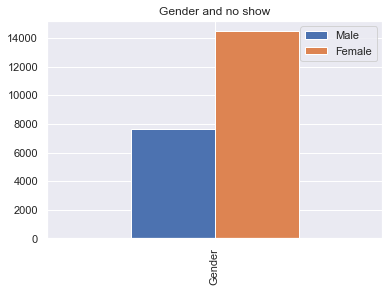

In [53]:
gender[['Male','Female']].plot(kind = 'bar', title = 'Gender and no show');

##### From the above garph we can see that, females tend to miss more appointments. However, lets confirm the same to see if the number of males and females acn affect this result

In [54]:
no_males = df_1[df_1['Gender'] == 'M'].count()['Gender']
no_females = df_1[df_1['Gender'] == 'F'].count()['Gender']

In [55]:
gender_count = pd.DataFrame({'Male_no': [no_males], 'Female_no': [no_females]}, index = ['Gender_count'])
gender_count

,Male_no,Female_no
Gender_count,38351,71016


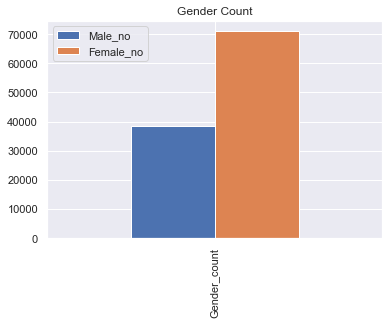

In [57]:
gender_count[['Male_no','Female_no']].plot(kind = 'bar', title = 'Gender Count');

In [58]:
male_percent = male/no_males
female_percent = female/no_females

In [59]:
# percentage of males that was no show from the total male count
male_percent


0.1997861854971187

In [60]:
# percentage of females that was no show from the total female count

female_percent

0.20364424918328264

#### So as we can see that the total count of males is less than the femal count as well the number of males and females that were a no show
#### However, when we look at the precentage of male patients that were a no show from the total male count it is almost equal to the female percentage that didn't show up for their appointment 
#### which concludes that, the gender doesn't affect the no show males and females have the same no show percentage

<a id='conclusions'></a>
## Conclusions

> ###### **Parameters that we checked**: 
> ###### **Age** - We can see that more young people miss their appointments than older patients
> ###### **Scholarship** - The scholarship doesn't have an impact weither the patient show up or not
> ###### **Gender** - Same percentage of males and females miss their appointment

## Limitations of the collected data
> 1 -  first of all the age, it is somehow normally distributed to represent most of the population

> 2 - Scholarship (Yes, No) 99% of the sample didn't get the scholarship which might affect our prediction regarding the no show

> 3 - Gender - the female count is almost twice the male count which might not present an accurate results regarding the no show prediction. However, it shows that females tend to have more appointments than males

> ###### The size of the data is sufficient to make predictions. However, since the collected data is not diverse enough we need to try and collect more data.

> ###### We can also try to add data if the patients have serious health conditions such as cancer or heart disease